**Import Data**





*   Melakukan import data langsung dari kaggle



sumber data : https://www.kaggle.com/code/gabrielsantello/airline-complaints-sarima-forecasting#Preparing-Data

In [329]:
# Membuat folder .kaggle di dalam folder root
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke folder .kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [330]:
!kaggle datasets download -d gabrielsantello/airline-baggage-complaints-time-series-dataset

Dataset URL: https://www.kaggle.com/datasets/gabrielsantello/airline-baggage-complaints-time-series-dataset
License(s): other
airline-baggage-complaints-time-series-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [331]:
!unzip /content/airline-baggage-complaints-time-series-dataset.zip

Archive:  /content/airline-baggage-complaints-time-series-dataset.zip
replace baggagecomplaints.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n




*   Membuka file yang telah di import dari kaggle



In [332]:
import pandas as pd

data = pd.read_csv('/content/baggagecomplaints.csv')
data

,Airline,Date,Month,Year,Baggage,Scheduled,Cancelled,Enplaned
0,American Eagle,01/2004,1,2004,12502,38276,2481,992360
1,American Eagle,02/2004,2,2004,8977,35762,886,1060618
2,American Eagle,03/2004,3,2004,10289,39445,1346,1227469
3,American Eagle,04/2004,4,2004,8095,38982,755,1234451
4,American Eagle,05/2004,5,2004,10618,40422,2206,1267581
...,...,...,...,...,...,...,...,...
247,United,08/2010,8,2010,14099,30637,344,4263211
248,United,09/2010,9,2010,9435,28072,161,3679517
249,United,10/2010,10,2010,9565,29144,140,3952549
250,United,11/2010,11,2010,8597,27318,104,3573268



Kumpulan data berisi pengamatan bulanan dari tahun 2004 hingga 2010 untuk United Airlines, American Eagle, dan Hawaiian Airlines. Variabel-variabel dalam kumpulan data tersebut meliputi:



*   Baggage - Jumlah total keluhan penumpang untuk pencurian isi bagasi, atau untuk bagasi yang hilang, rusak, atau salah kirim untuk maskapai pada bulan tersebut
*   Scheduled - Jumlah total penerbangan yang dijadwalkan oleh maskapai tersebut pada bulan itu


*   Cancelled - Jumlah total penerbangan yang dibatalkan oleh maskapai tersebut pada bulan tersebut
*   Enplaned - Jumlah total penumpang yang naik pesawat dengan maskapai tersebut pada bulan itu




In [333]:
#melihat tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Airline    252 non-null    object
 1   Date       252 non-null    object
 2   Month      252 non-null    int64 
 3   Year       252 non-null    int64 
 4   Baggage    252 non-null    int64 
 5   Scheduled  252 non-null    int64 
 6   Cancelled  252 non-null    int64 
 7   Enplaned   252 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 15.9+ KB


In [334]:
#statistika deskriptif
data.describe()

,Month,Year,Baggage,Scheduled,Cancelled,Enplaned
count,252.000000,252.00000,252.000000,252.000000,252.000000,2.520000e+02
mean,6.500000,2007.00000,12613.507937,28128.007937,703.761905,2.203871e+06
std,3.458922,2.00398,9993.307166,17092.087874,746.020368,1.788200e+06
min,1.000000,2004.00000,1033.000000,3553.000000,0.000000,4.234460e+05
25%,3.750000,2005.00000,1910.500000,5565.750000,25.750000,6.865205e+05
50%,6.500000,2007.00000,12224.000000,36696.000000,533.000000,1.391112e+06
75%,9.250000,2009.00000,19359.250000,42162.500000,1078.500000,4.111049e+06
max,12.000000,2010.00000,41787.000000,50837.000000,3712.000000,6.137271e+06


**Data Cleaning**

Melakukan data cleaning dan data preparation sebetulnya tergantung dengan model yang akan digunakan untuk data. Disini kita tidak mengetahui model apa yang akan digunakan jadi kita akan mencoba menerapkan semua proses data cleaning dan data preparation.



*   Menangani missing value


In [335]:
#cek apakah terdapat missing value
data.isnull().sum()

,0
Airline,0
Date,0
Month,0
Year,0
Baggage,0
Scheduled,0
Cancelled,0
Enplaned,0


karena tidak terdapat missing value pada data maka kita tidak perlu menangani missing value. Untuk data yang memiliki missing value dapat diatasi dengan beberapa cara diantaranya:



1. Menghapus baris atau kolom yang mengandung missing value (NaN). Sintaks:


*   data2 = data.dropna() - menghapus semua baris yang mengandung NaN
*   data2 = data.dropna(axis=1) - menghapus semua baris yang mengandung NaN



2. Mengganti missing value dengan nilai Mean atau Median. Sintaks:


*   data2 = data['Baggage'].fillna(data['Baggage'].mean(), inplace=True) - dimisalkan terdapat missing value pada variabel Baggage dan diganti dengan nilai mean pada variabel tersebut
*   data2 = data['Scheduled'].fillna(data['Scheduled'].median(), inplace=True) - dimisalkan terdapat missing value pada variabel Scheduled dan diganti dengan nilai median pada variabel tersebut













*   Memeriksa apakah ada data yang double atau terjadi duplikasi data




In [336]:
# Memeriksa duplikasi
data_duplikasi= data.duplicated().any() #ditambahkan any untuk memeriksa apakah ada baris yang bernilai true

if data_duplikasi == False :
  print("tidak ada data duplikat")
else :
  print("ada data duplikat")

tidak ada data duplikat


karena tidak ada data duplikat maka bisa lanjut ke tahap berikutnya. Jika data memiliki duplikat bisa dihapus dengan menggunakan sintaks

data_unik = data.drop_duplicates().



*   Visualisasi bloxpot untuk memeriksa outliners

Outliers variabel Baggage:
Empty DataFrame
Columns: [Airline, Baggage]
Index: []
Batas Bawah: -24262.625, Batas Atas: 45532.375



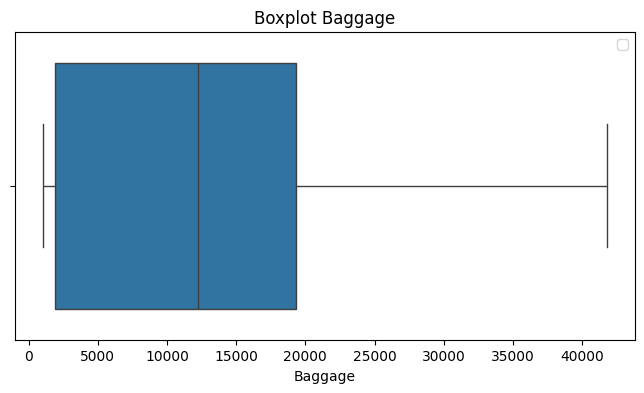

Outliers variabel Scheduled:
Empty DataFrame
Columns: [Airline, Scheduled]
Index: []
Batas Bawah: -49329.375, Batas Atas: 97057.625



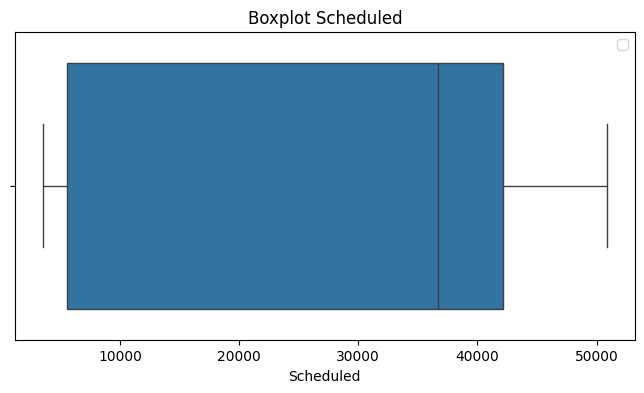

Outliers variabel Cancelled:
           Airline  Cancelled
12  American Eagle       3152
37  American Eagle       2976
41  American Eagle       2669
47  American Eagle       3712
49  American Eagle       3025
Batas Bawah: -1553.375, Batas Atas: 2657.625



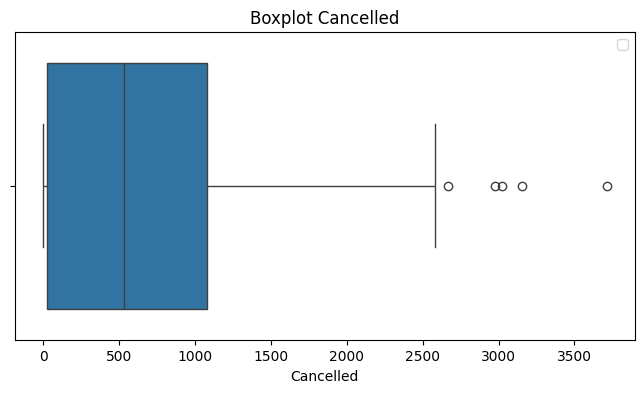

Outliers variabel Enplaned:
Empty DataFrame
Columns: [Airline, Enplaned]
Index: []
Batas Bawah: -4450272.625, Batas Atas: 9247842.375



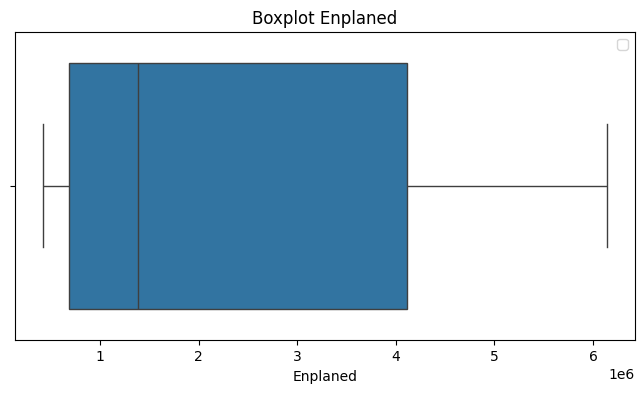

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns

#Dipilih kolom numerik selain bulan dan tahun
kolom_numerik = ["Baggage", 'Scheduled', 'Cancelled', 'Enplaned']
# Fungsi untuk menghitung dan mengambil outliers
def ambil_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    outliers = data[(data[column] < batas_bawah) | (data[column] > batas_atas)]
    return outliers, batas_bawah, batas_atas

# Menghitung outliers untuk setiap kolom numerik
for column in kolom_numerik:
    outliers, batas_bawah, batas_atas = ambil_outliers(column)
    print(f'Outliers variabel {column}:')
    print(outliers[['Airline', column]])
    print(f'Batas Bawah: {batas_bawah}, Batas Atas: {batas_atas}\n')

    # Membuat boxplot untuk kolom
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot {column}')
    plt.xlabel(column)
    plt.legend()
    plt.show()

ada banyak cara untuk menangani outliners tetapi kali ini saya menggunakan cara dengan mengganti nilai outliners dengan nilai batas terdekat.

Tidak ada outliers pada variabel Baggage

Tidak ada outliers pada variabel Scheduled

Menangani outliers untuk variabel Cancelled
Statistik deskriptif setelah penanganan outliers untuk Cancelled:
count     252.000000
mean      694.849702
std       717.744069
min         0.000000
25%        25.750000
50%       533.000000
75%      1078.500000
max      2657.625000
Name: Cancelled, dtype: float64


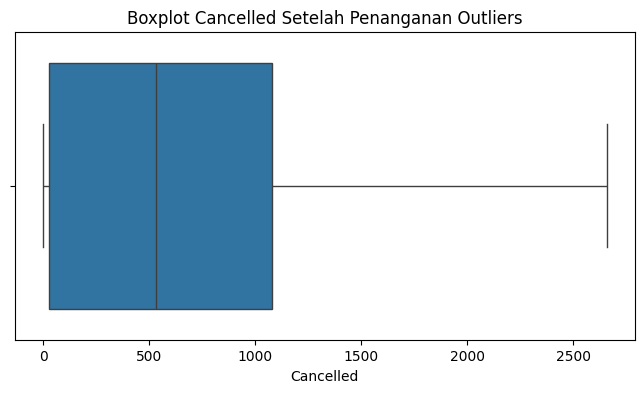

Tidak ada outliers pada variabel Enplaned



In [338]:
import numpy as np
# Fungsi untuk mengganti outliers dengan batas bawah/atas
def tangani_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    # Mengecek apakah ada outliers
    outliers = data[(data[column] < batas_bawah) | (data[column] > batas_atas)]

    if len(outliers) > 0:
        print(f'Menangani outliers untuk variabel {column}')
        #mengganti outliers dengan batas terdekat
        data[column] = np.where(data[column] < batas_bawah, batas_bawah, data[column])
        data[column] = np.where(data[column] > batas_atas, batas_atas, data[column])
        print(f'Statistik deskriptif setelah penanganan outliers untuk {column}:')
        print(data[column].describe())

        # Membuat boxplot setelah penanganan
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column])
        plt.title(f'Boxplot {column} Setelah Penanganan Outliers')
        plt.xlabel(column)
        plt.show()
    else:
        print(f'Tidak ada outliers pada variabel {column}\n')

# Menerapkan penanganan outliers untuk setiap kolom numerik
for column in kolom_numerik:
    tangani_outliers(column)



*   Mengubah kolom date menjadi tipe data datetime dan menghapus kolom bulan dan tahun karena sudah diwakili oleh kolom date


In [339]:
#Mengubah format date
data['Date'] = pd.to_datetime(data['Date'], format='%m/%Y').dt.to_period('M')

#Menghapus kolom month dan year
data = data.drop(columns=['Month','Year'])

#Data sesudah diubah
data.info()
print("Data Sesudah diubah")
data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype    
---  ------     --------------  -----    
 0   Airline    252 non-null    object   
 1   Date       252 non-null    period[M]
 2   Baggage    252 non-null    int64    
 3   Scheduled  252 non-null    int64    
 4   Cancelled  252 non-null    float64  
 5   Enplaned   252 non-null    int64    
dtypes: float64(1), int64(3), object(1), period[M](1)
memory usage: 11.9+ KB
Data Sesudah diubah


,Airline,Date,Baggage,Scheduled,Cancelled,Enplaned
0,American Eagle,2004-01,12502,38276,2481.0,992360
1,American Eagle,2004-02,8977,35762,886.0,1060618
2,American Eagle,2004-03,10289,39445,1346.0,1227469
3,American Eagle,2004-04,8095,38982,755.0,1234451
4,American Eagle,2004-05,10618,40422,2206.0,1267581
...,...,...,...,...,...,...
247,United,2010-08,14099,30637,344.0,4263211
248,United,2010-09,9435,28072,161.0,3679517
249,United,2010-10,9565,29144,140.0,3952549
250,United,2010-11,8597,27318,104.0,3573268




*   Mengubah kolom date menjadi index hal ini sering kali diperlukan dalam pengolahan data time series





In [340]:
# Mengubah kolom 'Date' menjadi indeks
data = data.set_index('Date')

# Data setelah diubah
data

,Airline,Baggage,Scheduled,Cancelled,Enplaned
Date,,,,,
2004-01,American Eagle,12502,38276,2481.0,992360
2004-02,American Eagle,8977,35762,886.0,1060618
2004-03,American Eagle,10289,39445,1346.0,1227469
2004-04,American Eagle,8095,38982,755.0,1234451
2004-05,American Eagle,10618,40422,2206.0,1267581
...,...,...,...,...,...
2010-08,United,14099,30637,344.0,4263211
2010-09,United,9435,28072,161.0,3679517
2010-10,United,9565,29144,140.0,3952549


**Data Preparation**



*   Melakukan normalisasi dan standarisasi (karena rentang nilai tiap variabel berbeda)




1. Normalisasi

Normalisasi adalah salah satu teknik yang dipakai dalam data preparation. Tujuan dari normalisasi adalah mengubah nilai-nilai dari sebuah fitur ke dalam skala yang sama.

In [341]:
from sklearn.preprocessing import MinMaxScaler
data_normalisasi = data.copy()
scaler = MinMaxScaler()
data_normalisasi[kolom_numerik] = scaler.fit_transform(data_normalisasi[kolom_numerik])
print(data_normalisasi)

                Airline   Baggage  Scheduled  Cancelled  Enplaned
Date                                                             
2004-01  American Eagle  0.281420   0.734350   0.933540  0.099568
2004-02  American Eagle  0.194926   0.681182   0.333380  0.111514
2004-03  American Eagle  0.227119   0.759073   0.506467  0.140715
2004-04  American Eagle  0.173284   0.749281   0.284088  0.141937
2004-05  American Eagle  0.235192   0.779735   0.830064  0.147736
...                 ...       ...        ...        ...       ...
2010-08          United  0.320607   0.572794   0.129439  0.672013
2010-09          United  0.206164   0.518548   0.060580  0.569858
2010-10          United  0.209354   0.541219   0.052679  0.617643
2010-11          United  0.185601   0.502601   0.039133  0.551263
2010-12          United  0.328360   0.508967   0.225389  0.537328

[252 rows x 5 columns]


2. Standarisasi

Standarisasi adalah proses konversi nilai-nilai dari suatu fitur sehingga nilai-nilai tersebut memiliki skala yang sama. Z score adalah metode paling populer untuk standardisasi di mana setiap nilai pada sebuah atribut numerik akan dikurangi dengan rata-rata dan dibagi dengan standar deviasi dari seluruh nilai pada sebuah kolom atribut. Fungsi standardisasi itu serupa dengan normalisasi. Keduanya berfungsi menyamakan skala nilai dari tiap atribut pada data.

In [342]:
from sklearn.preprocessing import StandardScaler
data_standarisasi = data.copy()
scaler = StandardScaler()
data_standarisasi[kolom_numerik] = scaler.fit_transform(data_standarisasi[kolom_numerik])
print(data_standarisasi)

                Airline   Baggage  Scheduled  Cancelled  Enplaned
Date                                                             
2004-01  American Eagle -0.011180   0.594906   2.493514 -0.678851
2004-02  American Eagle -0.364619   0.447528   0.266851 -0.640604
2004-03  American Eagle -0.233069   0.663436   0.909023 -0.547111
2004-04  American Eagle -0.453053   0.636294   0.083971 -0.543199
2004-05  American Eagle -0.200082   0.720711   2.109607 -0.524635
...                 ...       ...        ...        ...       ...
2010-08          United  0.148945   0.147085  -0.489796  1.153919
2010-09          United -0.318697  -0.003283  -0.745269  0.826855
2010-10          United -0.305662   0.059561  -0.774585  0.979845
2010-11          United -0.402720  -0.047485  -0.824842  0.767321
2010-12          United  0.180629  -0.029840  -0.133809  0.722704

[252 rows x 5 columns]


Dimisalkan pada kasus kali ini dibutuhkan data yang sudah di standarisasi maka kita akan melanjutkan dengan menggunakan data yang sudah di standarisasi.




*   Teknik One-Hot-Encoding

Model seringkali tidak bisa memproses data kategorik oleh karena itu kita perlu mengubah menjadi data numerik. Salah satu teknik untuk mengubah data kategorik menjadi data numerik adalah dengan menggunakan One Hot Encoding atau yang juga dikenal sebagai dummy variables. One Hot Encoding mengubah data kategorik dengan membuat kolom baru untuk setiap kategori seperti gambar di bawah.




In [343]:
from sklearn.preprocessing import LabelEncoder
# Mengonversi kolom 'Airline' menjadi angka
label_encoder = LabelEncoder()
data_standarisasi['Airline_encoded'] = label_encoder.fit_transform(data_standarisasi['Airline'])
data_standarisasi['Airline'] = data_standarisasi['Airline_encoded']
data_standarisasi.drop('Airline_encoded', axis=1, inplace=True)
print(data_standarisasi)

         Airline   Baggage  Scheduled  Cancelled  Enplaned
Date                                                      
2004-01        0 -0.011180   0.594906   2.493514 -0.678851
2004-02        0 -0.364619   0.447528   0.266851 -0.640604
2004-03        0 -0.233069   0.663436   0.909023 -0.547111
2004-04        0 -0.453053   0.636294   0.083971 -0.543199
2004-05        0 -0.200082   0.720711   2.109607 -0.524635
...          ...       ...        ...        ...       ...
2010-08        2  0.148945   0.147085  -0.489796  1.153919
2010-09        2 -0.318697  -0.003283  -0.745269  0.826855
2010-10        2 -0.305662   0.059561  -0.774585  0.979845
2010-11        2 -0.402720  -0.047485  -0.824842  0.767321
2010-12        2  0.180629  -0.029840  -0.133809  0.722704

[252 rows x 5 columns]


Download data yang sudah siap digunakan

In [344]:
from google.colab import files
df = pd.DataFrame(data_standarisasi)

# Menyimpan ke file excel
file_path = 'data_airlines.xlsx'
df.to_excel(file_path, index=True)

# Mengunduh file Excel
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Pada file tersebut date otomatis menjadi tanggal 1 dan jam 00.00 karena data tidak lengkap dengan jam dan tanggalnya.